<a href="https://colab.research.google.com/github/Apple03244/Total_Projects/blob/main/RNN%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import google.colab as colab
import pandas as pd

In [ ]:
f=colab.files
files=f.upload()

Saving sample_submission.csv to sample_submission.csv
Saving train.csv to train.csv


In [ ]:
data=pd.read_csv('/content/train.csv')

## 순환뉴런(Recurrent Neural Network)
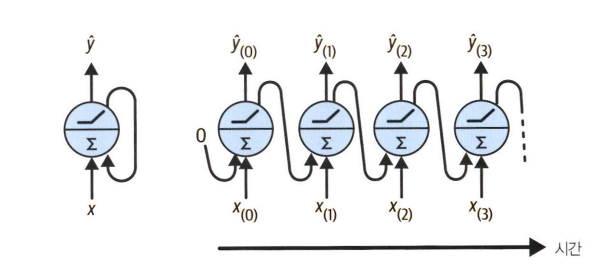

### 1.1 순환뉴런의 구조
$\hat y_{(t)}=\phi(W_x^T x_{t}+W_{\hat y}^T \hat y_{(t-1)}+b)
=\phi([X_{t} \hat Y_{t-1}]W+b)$ , where $W=\binom{W_x}{W_{\hat y}}$

### 1.2 Memory Cell(셀)
타임 스텝에 걸쳐서 어떤 상태를 보존하는 신경망의 구성요소

$h_{t}=f(x_t,h_{t-1})$

### 2.1 입력과 출력 시퀀스


|구조|설명|
|--|--|
|sequence-to-sequence|시계열 데이터를 예측|
|sequence-to-vector|마지막을 제외한 모든 출력을 무시하는 방법|
|vector-to-sequence|각 타입스텝에 하나의 입력 벡터를 받아 하나의 시퀀스를 만드는 것|
|encoder-decoder|stv -> vts 로 연결하는 방법|

### 3.1 RNN 훈련
타입스텝으로 네트워크를 펼치고 보통의 역전파를 사용하는 것

`backpropagation through time`(BPTT)

step1. 정방향 패스가 펼쳐진 네트워크를 통과한다

step2. 손실함수 $l(Y_{0},Y_1,...,Y_{T}:\hat Y_0,\hat Y_1,...,\hat Y_T)$ 추출

step3. 역방향 계산이 완료되고 모든 그래디언트가 계산되면 경사하강법을 수행하여 파라미터를 업데이트

----

## 실습 : 시계열

### step 1. 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
from matplotlib import font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 14, 'font.family': 'NanumGothic'}) # 폰트 설정

데이터 타입 바꾸기

In [ ]:
data["일시"]=data["일시"].apply(lambda x:pd.to_datetime(x))

In [ ]:
# 1960년도 데이터만 추출해보자
data_1960=data[(data["일시"].apply(lambda x:x.year==1960))]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


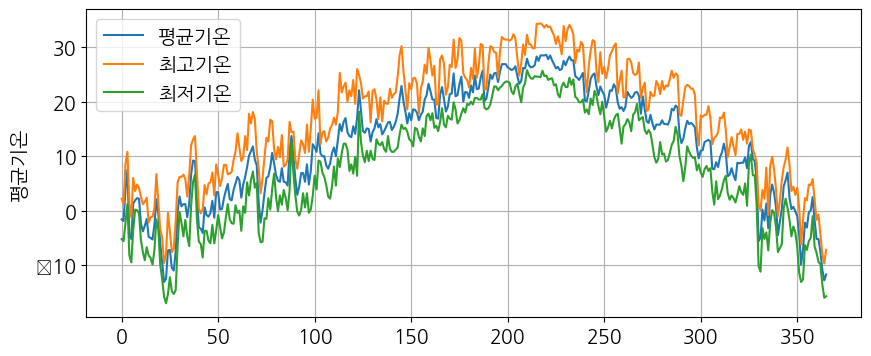

In [ ]:
plt.figure(figsize=(10,4))
for colname in ['평균기온',"최고기온","최저기온"]:
  sb.lineplot(x=data_1960.index,y=data_1960[colname],label=colname)
plt.grid()
plt.show()
plt.close()

5년치로 확장해보자

In [ ]:
data_5_year=data[data["일시"].apply(lambda x:x.year<1965)]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


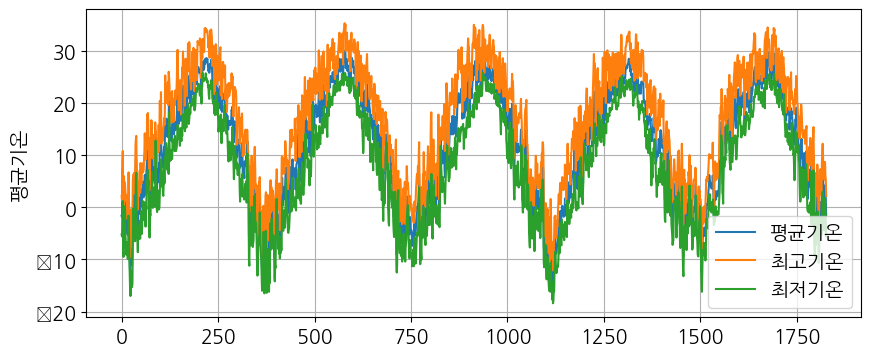

In [ ]:
plt.figure(figsize=(10,4))
for colname in ['평균기온',"최고기온","최저기온"]:
  sb.lineplot(x=data_5_year.index,y=data_5_year[colname],label=colname)
plt.grid()
plt.show()
plt.close()

연단위로 `계절성`이 보인다

In [ ]:
diff_data_5_year=data_5_year.diff(365)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


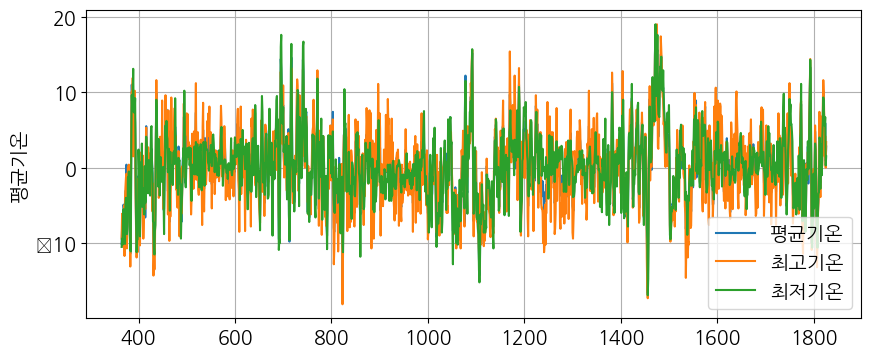

In [ ]:
plt.figure(figsize=(10,4))
for colname in ['평균기온',"최고기온","최저기온"]:
  sb.lineplot(x=diff_data_5_year.index,y=diff_data_5_year[colname],label=colname)
plt.grid()
plt.show()
plt.close()

diff 한번만으로는 확실히 변동성이 완전히 사라지지 않음

### step 2. ARIMA

모델 : $\hat y_t=\sum_{i=1}^{p} \alpha_i y_{t-1}+\sum_{i=1}^{q} \theta_i \epsilon_{t-1}$, where $\epsilon_t=y_t-\hat y_t$

가정 : 정상 시계열